# Block 33: Career Simulation
## Employee Turnover Analytics


    
### Project Statement:

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details, including the number of projects they worked on, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level.

Data from prior evaluations show the employees’ satisfaction in the workplace. The data could be used to identify patterns in workstyle and their interest in continuing to work for the company.  

The HR department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain period of time.

As the ML developer assigned to the HR department, you have been asked to create ML programs to

* Perform a data quality check by checking for missing values.

* Understand what factors contributed most to employee turnover by EDA.

* Perform a clustering of employees who left based on their satisfaction and evaluation.

* Handle the left-class imbalance using the SMOTE technique.

* Perform k-fold cross-validation model training and evaluate performance.  

* Identify the best model and justify the evaluation metrics used.  

* Suggest various retention strategies for targeted employees.


### Data will be modified from:  

https://www.kaggle.com/liujiaqi/hr-comma-sepcsv
![Block_33_PS_datatable.png](attachment:Block_33_PS_datatable.png)

### Perform the following steps:

* Perform a data quality check by checking for missing values if any.

* Understand what factors contributed most to employee turnover by EDA.

  * Draw a heatmap of the correlation matrix between all numerical features/columns in the data.

  * Draw the distribution plot of  

    * Employee satisfaction (use column satisfaction_level)

    * Employee evaluation (use column last_evaluation)

    * Employee average monthly hours (use column average_montly_hours)

  * Draw the bar plot of the employee project count of both employees who left and who stayed in the organization (use column number_project and hue column turnover) and give your inferences from the plot.

* Perform a clustering of employees who left based on their satisfaction and evaluation.

  * Choose columns satisfaction_level, last_evaluation, and turnover.

  * K-means clustering of employees who left the company into 3 clusters.

  * Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

* Handle the left-class imbalance using the SMOTE technique.

  * Pre-process the data by converting categorical columns to numerical columns by:

    * Separating categorical variables and numeric variables

    * Applying get_dummies() to the categorical variables

    * Combining categorical variables and numeric variables



  * Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

  * Upsample the training dataset using the SMOTE technique from the `imblearn` module.

* Perform 5-fold cross-validation model training and evaluate performance.  

  * Train a logistic regression model, apply a 5-fold CV, and plot the classification report.

  * Train a random forest classifier model, apply the 5-fold CV, and plot the classification report.

  * Train a gradient boosting classifier model, apply the 5-fold CV, and plot the classification report.

* Identify the best model and justify the evaluation metrics used.  

  * Find the ROC/AUC for each model and plot the ROC curve.

  * Find the confusion matrix for each of the models.

  * Explain which metric needs to be used: Recall or Precision?

* Suggest various retention strategies for targeted employees.

  * Using the best model, predict the probability of employee turnover in the test data.

  * Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.

* Safe Zone (Green) (Score <= 20%)

* Low Risk Zone (Yellow) (20% < Score <= 60%)

* Medium Risk Zone (Orange) (60% < Score < 90%)

* High Risk Zone (Red) (Score => 90%).

### We'll be covering:
* Descriptive Analytics: What happened?
* Predictive Analytics: What Might Happen?
* Prescriptive Analytics: What Should We Do?


***
### Objective:
To understand what factors contributed most to employee turnover.

To perform clustering of employees who left based on their satisfaction and evaluation

To create a model that predicts the likelihood that a certain employee will leave the company or not.

To create or improve different retention strategies for targeted employees.

<a id='dataset'></a>
#### Reading the Data
***

In [ ]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Load the dataset
# TODO: Complete this section
df = pd.read_csv("HR_comma_sep.csv")

In [ ]:
# Examine the dataset
# TODO: Complete this section
df.shape
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Rename Columns
df = df.rename(columns={'satisfaction_level': 'satisfaction',
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [ ]:
# Print the first few rows
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Check class (turnover) distribution
# TODO: Complete this section
left_counts = df['turnover'].value_counts()
print("Class Counts:\n", left_counts)

Class Counts:
 0    11428
1     3571
Name: turnover, dtype: int64


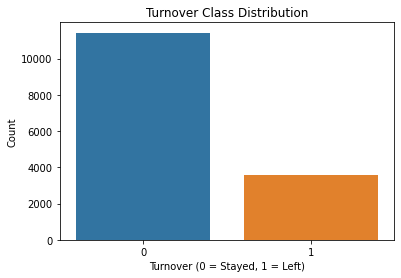

In [ ]:
# Plot barplot of class distribution
# TODO: Complete this section
sns.countplot(x='turnover', data=df)
plt.title('Turnover Class Distribution')
plt.xlabel('Turnover (0 = Stayed, 1 = Left)')
plt.ylabel('Count')
plt.show()

<a id='datacleaning'></a>
##### 1. Perform data quality check by checking for missing values if any
***

In [ ]:
# Can you check to see if there are any missing values in our data set?
# TODO: Complete this section
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 satisfaction           0
evaluation             0
projectCount           0
averageMonthlyHours    0
yearsAtCompany         0
workAccident           0
turnover               0
promotion              0
department             0
salary                 0
dtype: int64


In [ ]:
# Check the datatype of our features. Are there any data inconsistencies?
# TODO: Complete this section

for col in df:
    print(f"{col} unique values: {df[col].unique()}")
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")
print(df.describe())
print(df.info())

satisfaction unique values: [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
evaluation unique values: [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
projectCount unique values: [2 5 7 6 4 3]
averageMonthlyHours unique values: [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 2

<a id='descriptive_statistics'></a>
##### 2. Understand what factors contributed most to employee turnover by EDA
***

In [ ]:
# Display the statistical overview of the employees
# TODO: Complete this section

stats = df.describe()
print(stats)

       satisfaction    evaluation  projectCount  averageMonthlyHours  \
count  14999.000000  14999.000000  14999.000000         14999.000000   
mean       0.612834      0.716102      3.803054           201.050337   
std        0.248631      0.171169      1.232592            49.943099   
min        0.090000      0.360000      2.000000            96.000000   
25%        0.440000      0.560000      3.000000           156.000000   
50%        0.640000      0.720000      4.000000           200.000000   
75%        0.820000      0.870000      5.000000           245.000000   
max        1.000000      1.000000      7.000000           310.000000   

       yearsAtCompany  workAccident      turnover     promotion  
count    14999.000000  14999.000000  14999.000000  14999.000000  
mean         3.498233      0.144610      0.238083      0.021268  
std          1.460136      0.351719      0.425924      0.144281  
min          2.000000      0.000000      0.000000      0.000000  
25%          3.000000

In [ ]:
# Display the mean summary of Employees (Turnover V.S. Non-turnover). What do you notice between the groups?

# Group data by turnover, return turnover dataframe.
def compute_turnover_Summary():
    # TODO: Implement this function
    turnover_summary = df.groupby('turnover')
    return turnover_summary

# TODO: Call function compute_turnover_Summary()
# Store turnover dataframe in variable called turnover_Summary
turnover_Summary = compute_turnover_Summary()
print(turnover_Summary)

In [ ]:
# Calculate mean of Turnover V.S. Non-turnover employees.
round(turnover_Summary.mean(), 2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


In [ ]:
# Calculate std of Turnover V.S. Non-turnover employees
round(turnover_Summary.std(), 2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.22,0.16,0.98,45.68,1.56,0.38,0.16
1,0.26,0.20,1.82,61.20,0.98,0.21,0.07


<a id='correlation_matrix'></a>
### Correlation Matrix

In [ ]:
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?
# TODO: Complete this section

correlation_matrix = df.corr()

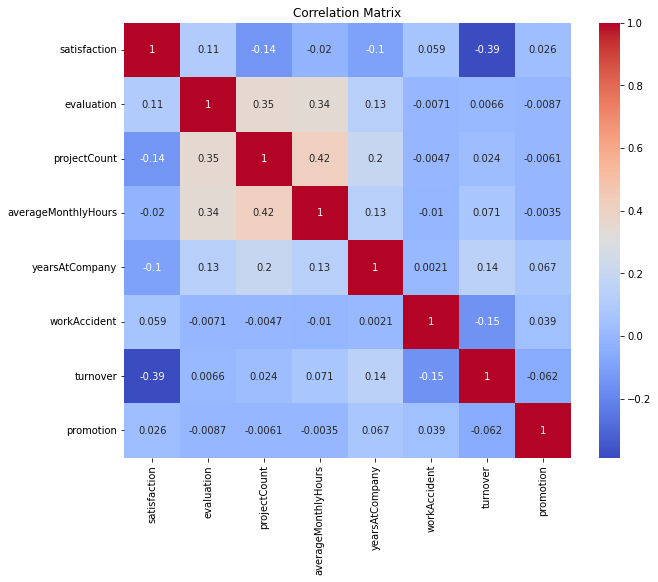

In [ ]:
# Draw a heatmap of the correlation matrix between all numerical features/columns in the data.
# Add title, xticklabels and yticklabels
# TODO: Complete this section
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


<a id='eda1'></a>
###### Distribution of Satisfaction, Evaluation, and Monthly Hours

**Task:** Draw the distribution plot of:
- Employee satisfaction
- Employee evaluation
- Employee average monthly hours

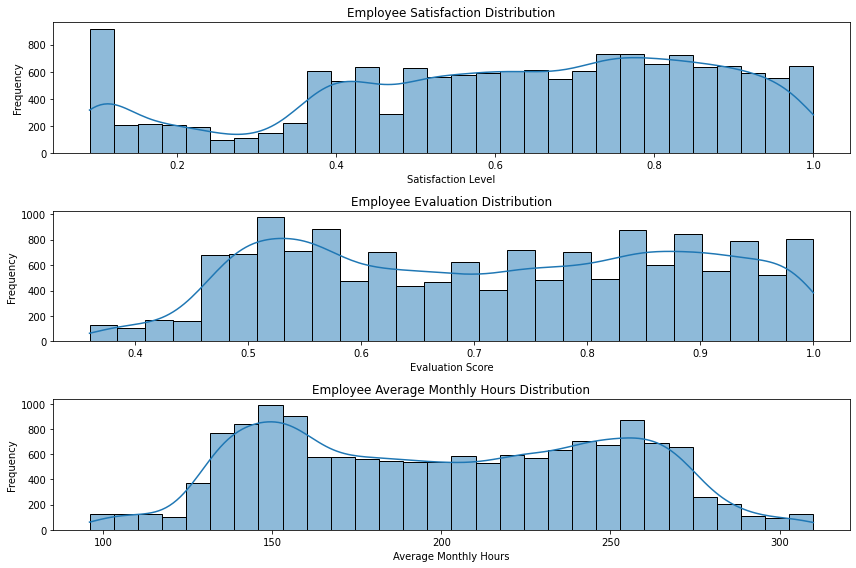

In [ ]:
# TODO: Complete this section
# Plot the distribution of Employee Satisfaction, Evaluation, and average monthly hours. What story can you tell?

# TODO: Complete this section
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))


# TODO: Complete this section
# Graph Employee Satisfaction
sns.distplot(kde=False)

plt.subplot(3, 1, 1)
sns.histplot(df['satisfaction'], kde=True)
plt.title('Employee Satisfaction Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')


# TODO: Complete this section
# Graph Employee Evaluation
sns.distplot()

plt.subplot(3, 1, 2)
sns.histplot(df['evaluation'], kde=True)
plt.title('Employee Evaluation Distribution')
plt.xlabel('Evaluation Score')
plt.ylabel('Frequency')


# TODO: Complete this section
# Graph Employee Average Monthly Hours
sns.distplot()

plt.subplot(3, 1, 3)
sns.histplot(df['averageMonthlyHours'], kde=True)
plt.title('Employee Average Monthly Hours Distribution')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')

plt.tight_layout()

<a id='project_count'></a>
##### Bar plot of employee project count

**Task:**
- Draw the bar plot of the employee project count of both employees who left and who stayed in the organization (use column number_project and hue column turnover)
- Give your inferences from the plot

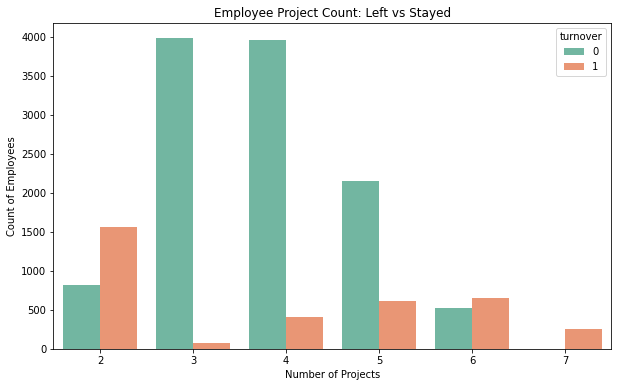

In [ ]:
# TODO: Complete this section
# Set up the matplotlib figure

plt.figure(figsize=(10, 6))

# TODO: Complete this section
# Create bar plot of project count of both, employees who left and who stayed

sns.countplot(data=df, x='projectCount', hue='turnover', palette='Set2')

# TODO: Complete this section
# Set xlabel and ylabel

plt.xlabel('Number of Projects')
plt.ylabel('Count of Employees')
plt.title('Employee Project Count: Left vs Stayed')

plt.show()

- More than half of the employees with **2, 6 and 7** projects left the company
- Majority of the employees who did not leave the company had **3,4, and 5** projects
- All of the employees with **7** projects left the company
- There is an increase in employee turnover rate as project count increases

<a id='clustering'></a>
##### 3. Perform clustering of Employees who left based on their satisfaction and evaluation
***

**Task:**
- Perform a clustering of employees who left based on their satisfaction and evaluation.
- Choose columns satisfaction_level, last_evaluation, and turnover.
- K-means clustering of employees who left the company into 3 clusters.
- Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

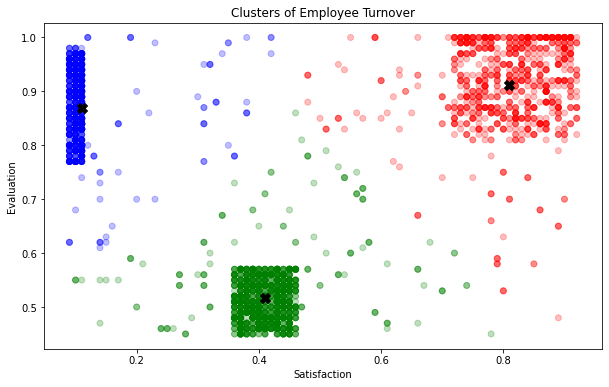

In [ ]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")

plt.show();

**Cluster 1 (Blue):** Hard-working and Sad Employees

**Cluster 2 (Red):** Bad and Sad Employee

**Cluster 3 (Green):** Hard-working and Happy Employee

`There are 3 distinct clusters for employees who left the company`

**Cluster 1 (Hard-working and Sad Employee):** Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.
 - **Question:** What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

**Cluster 2 (Bad and Sad Employee):** Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.
 - **Question:** Could this cluster mean employees who "under-performed"?

**Cluster 3 (Hard-working and Happy Employee):** Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.
 - **Question:** Could this cluser mean that employees left because they found another job opportunity?

__Observations__
- Cluster 1:
Yes that could be a possibility due to bad working conditions, feeling underappreciated, or taken advantage of.


- Cluster 2:
It could be a lack of motivation or not getting validation they need to feel appreciated.


- Cluster 3:
They could be happier and feel capable with their responsibilities of work or appreciated the most.

<a id='pre_processing'></a>
#### Pre-processing
***

##### 4.Handle the ***left*** Class Imbalance using SMOTE technique.

##### 4a. Pre-Process the data by converting categorical columns to numerical
- Separate categorical variables and numeric variables.
- Apply **get_dummies()** to the categorical variables.
- Combine categorical variables and numeric variables.

In [ ]:
# TODO: Implement this function
from imblearn.over_sampling import SMOTE

def compute_new_df():
    # TODO: Implement this function

    # Separate categorical variables and numeric variables into separate dataframes.
        categorical_columns = df.select_dtypes(include=['object']).columns
        numeric_columns = df.select_dtypes(exclude=['object']).columns

    # Apply get_dummies() to the categorical variables.
        categorical_df = pd.get_dummies(df[categorical_columns], drop_first=False)

    # Combine categorical variables and numeric variables into one dataframe and return single combined dataframe.
        numeric_df = df[numeric_columns]
        new_df = pd.concat([numeric_df, categorical_df], axis=1)

        return new_df
    # Name combined dataframe new_df
new_df = compute_new_df()

In [ ]:
new_df.shape

(14999, 21)

In [ ]:
# TODO: Complete this section
# Print first few rows of new_df
new_df.head(5)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0



##### 4b. Split Train/Test Set

##### Let's split our data into a train and test set. We'll fit our model with the train set and leave our test set for our last evaluation.

- Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [ ]:
# TODO: Complete this section
# Create the X and y set
y = new_df['turnover']
X = new_df.drop(columns=['turnover'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(11999, 20)
(3000, 20)


##### 4c. Class Imbalance

##### Employee Turnover Rate: 24%

In [ ]:
round(df.turnover.value_counts(1), 2)

0    0.76
1    0.24
Name: turnover, dtype: float64

##### 4c. Upsample the train dataset using SMOTE technique

In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Upsample using SMOTE
sm = SMOTE(random_state=12, sampling_strategy=1.0)
x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [ ]:
print("Original shape:", X_train.shape, y_train.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)

Original shape: (11999, 20) (11999,)
SMOTE sample shape: (18284, 20) (18284,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

##### Perform 5-Fold cross validation model training and evaluate performance
***

- Train a logistic regression model, apply a 5-fold CV, and plot the classification report.
- Train a random forest classifier model, apply the 5-fold CV, and plot the classification report.
- Train a gradient boosting classifier model, apply the 5-fold CV, and plot the classification report.

#### We're training 3 models:

1. Logistic Regression Classifier
2. Random Forest Classifier
3. Gradient Boosting Classifier

<a id='lr'></a>
## Logistic Regression Classifier

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr = lr.fit(x_train_sm, y_train_sm)
lr

LogisticRegression()

### Apply 5-Fold Cross Validation on Logistic Regression

In [ ]:
# TODO: Complete this section
# Apply 5-Fold Cross Validation on Logistic Regression

logreg = LogisticRegression(random_state=123, max_iter=1000, solver='lbfgs')

cv_scores = cross_val_score(logreg, x_train_sm, y_train_sm, cv=5, scoring='accuracy')

### Logistic Regression Classifier AUC  (0.77)

In [ ]:
print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

print(classification_report(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.78
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      2286
           1       0.53      0.79      0.63       714

    accuracy                           0.78      3000
   macro avg       0.73      0.78      0.74      3000
weighted avg       0.83      0.78      0.80      3000



<a id='rf'></a>
# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()
rf = rf.fit(x_train_sm, y_train_sm)
rf

RandomForestClassifier()

### Apply 5-Fold Cross Validation on Random Forest

In [ ]:
# TODO: Complete this section
# Apply 5-Fold Cross Validation on Random Forest

rf = RandomForestClassifier(random_state=123, n_estimators=100)
rf.fit(x_train_sm, y_train_sm)
cv_scores = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, scoring='accuracy')

### Random Forest Classifier AUC (0.98)

In [ ]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



<a id='svc'></a>
# Gradient Boosting Classifier


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc = gbc.fit(x_train_sm,y_train_sm)
gbc

GradientBoostingClassifier()

### Apply 5-Fold Cross Validation on Gradient Boosting Classifier

In [ ]:
# TODO: Complete this section
# Apply 5-Fold Cross Validation on Gradient Boosting Classifier

gbc = GradientBoostingClassifier(random_state=123)
gbc = gbc.fit(x_train_sm,y_train_sm)

cv_scores = cross_val_score(gbc, x_train_sm, y_train_sm, cv=5, scoring='accuracy')


### Gradient Boosting Classifier AUC  (0.96)

In [ ]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.95
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.92      0.94      0.93       714

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



# Model Evaluation (F1 Score & ROC/AUC)

<a id='roc'></a>
# ROC Graph

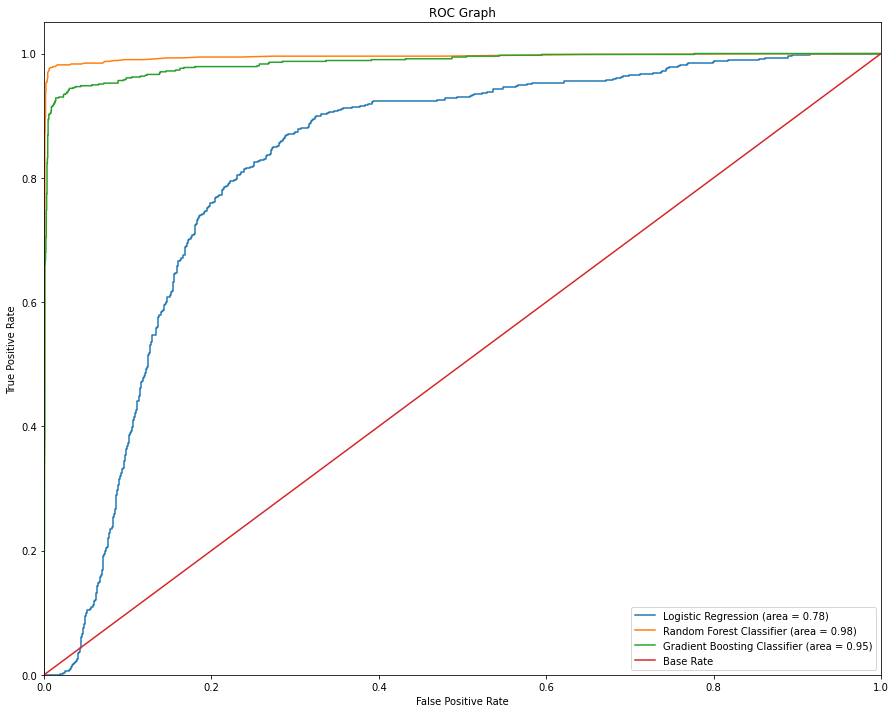

In [ ]:
# Create ROC Graph
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])


plt.figure(figsize=(15,12))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show();

In [ ]:
# Confusion Matrix for Logistic Regresion
# TODO: Complete this section

y_pred_lr = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1789  497]
 [ 152  562]]


In [ ]:
# Confusion Matrix for GBC
# TODO: Complete this section

y_pred_gbc = gbc.predict(X_test)
cm_gbc = confusion_matrix(y_test, y_pred_gbc)

print("Confusion Matrix for Gradient Boosting Classifier:")
print(cm_gbc)

Confusion Matrix for Gradient Boosting Classifier:
[[2226   60]
 [  46  668]]


In [ ]:
# Confusion Matrix for Random Forest
# TODO: Complete this section

y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix for Random Forest Classifier:")
print(cm_rf)

Confusion Matrix for Random Forest Classifier:
[[2265   21]
 [  16  698]]


# Recall or Precision?
- What do precision and recall tell us? Which one should we optimize? Why?


Observations:
Whenever trying to reduce false positives, or making sure that people will actually leave when the model predicts they will, precision is crucial.
When minimizing false negatives, getting the most at-risk employees as possible, regardless of whether this means keeping those who aren't truly at risk—recall is important.

##### 7. Suggest various retention strategies on targeted employees.

### 7a. Using the best model, predict the probability of employee turnover in the test data

### Retention Plan

In [ ]:
# Ranking turnover probability for employees
# TODO: Predict the probability of employee turnover in the test data.

turnover_probabilities = rf.predict_proba(X_test)[:, 1]

In [ ]:
# Turnover (0 or 1)
# Prediction probabilities are in this order

rf.classes_

array([0, 1])

**Task:**
- Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
- Safe Zone (Green) (Score <= 20%)
- Low Risk Zone (Yellow) (20% < Score <= 60%)
- Medium Risk Zone (Orange) (60% < Score < 90%)
- High Risk Zone (Red) (Score => 90%).

In [ ]:
# Probability of employee turnover in subset of test data.
list(rf.predict_proba(X_test)[175:185, 1])

[0.03, 0.0, 0.01, 1.0, 1.0, 0.2, 0.16, 1.0, 0.85, 0.07]

In [ ]:
# TODO: Complete this section

# Categorize the employees into Safe Zone

safe_zone = probabilities <= 0.20
print(f"Employees in Safe Zone: {safe_zone.sum()}")

Employees in Safe Zone: 2166


In [ ]:
# TODO: Complete this section

# Categorize the employees into Low Risk Zone

low_risk_zone = (probabilities > 0.20) & (probabilities <= 0.60)
print(f"Employees in the Low Risk Zone: {low_risk_zone.sum()}")

Employees in the Low Risk Zone: 125


In [ ]:
# TODO: Complete this section

# Categorize the employees into Medium Risk Zone

med_risk_zone = (probabilities > 0.60) & (probabilities < 0.90)
print(f"Employees in the Medium Risk Zone: {med_risk_zone.sum()}")

Employees in the Medium Risk Zone: 58


In [ ]:
# TODO: Complete this section

# Categorize the employees into High Risk Zone

high_risk_zone = probabilities <= 0.90
print(f"Employees in the High Risk Zone: {high_risk_zone.sum()}")

Employees in the High Risk Zone: 2355


### Suggest your thoughts on the retention strategies for each zone. What actions are required for the different zones?  

Observations:
For the safe zone employees, being consistent in interactions with rewards/recognition.
With the low risk zone employees, it is best to do check-ins and offer new challenges or training to keep them engaged and show that you care about their development.
As for the medium risk zone employees, you could help with managing their workload and request feedback where management can improve support.
Lastly, the high risk zone employees could be checked on and more management support regarding mental health or lifestyle.

## Conclusion

## What to Optimize
**Binary Classification**: Turnover V.S. Non Turnover

Instance Scoring: Likelihood of employee responding to an offer or incentive to save them from leaving

Need for application: save employees from leaving

In our employee retention problem, rather than simply predicting whether an employee will leave the company within a certain time frame, we would much rather have an estimate of the probability that he or she will leave the company. We would rank employees by their probability of leaving, then allocate a limited incentive budget to the highest-probability instances.

Solution 1:

We can rank employees by their probability of leaving, then allocate a limited incentive budget to the highest-probability instances.

OR, we can allocate our incentive budget to the instances with the highest expected loss, for which we'll need the probability of turnover.



---


Solution 2:

Develop learning programs for managers, then use analytics to gauge their performance and measure progress.

Be a good coach. Empower the team and do not micromanage.

Express interest in team members success.

Have a clear vision or strategy for the team.

Help the team with career development.   


# Selection Bias
***

One thing to note about the dataset is the turnover feature. We don't know if the employees that left are interns, contractors, full-time, or part-time. These are important variables to take into consideration when applying a machine learning algorithm to them.

Evaluation is heavily subjective and can vary tremendously depending on the evaluator. If the employee knows the evaluator, then he or she will probably have a higher score.